In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pd_dr


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [18]:
sns.set_style('white')

The purposes of this analysis is to find out which stocks to buys and to sell, on which day.


There are some basic techniques can be used as listed below. I'd recommend we use 4-5 one, and combine their result together. If a stocks get positive signal from 3-4 tools, then we should take actions (buy or sell depending).

1. On-balance volume (OBV)
2. Accumulation/Distribution Line
3. Average Directional Index (ADX)
4. The Aroon oscillator
5. Moving average convergence divergence (MACD) or Moving Average (MA): check which one is more suitable
6. Relative Strength Index (RSX)
7. Stochastic Oscillator
8. Trading Breakouts

# Some Stock Terms

1. High: Highest transaction price on the day
2. Low: Lowest transaction price on the day
3. Open: Price of first transaction of the day
4. Close: Price of last transaction of the day
5. Volume: Amount of stocks traded on that day
6. Adj Close: Adjusted closing price: real stock values after accounting for corporate action of the company. 

You can read more from [here](https://www.investopedia.com/terms/a/adjusted_closing_price.asp#:~:text=Adjusted%20closing%20price%20amends%20a%20stock's%20closing%20price%20to%20accurately,price%20before%20the%20market%20closes)

*Data Measurement*: Volume is quantitative,ratio and discrete. All other columns are quantitative, ratio and continuous.

In [3]:
# Kirin (KNBWY), Stingtao (TSGTF), Boston beer (SAM)
ticker= ["KNBWY","TSGTF","SAM" ]
companies= ['Kirin','Stingtao', 'Boston beer' ]
#Import all stocks at once.
df_original = pd_dr.DataReader(ticker, start="01-05-2015", end="01-04-2020",data_source='yahoo' )

#Import separately

kirin_original = pd_dr.DataReader('KNBWY', start="01-05-2015", end="01-04-2020",data_source='yahoo' )

stingtao_original = pd_dr.DataReader('TSGTF', start="01-05-2015", end="01-04-2020",data_source='yahoo' )

boston_original = pd_dr.DataReader('SAM', start="01-05-2015", end="01-04-2020",data_source='yahoo' )



In [4]:
df = df_original.copy()
kirin = kirin_original.copy()
stingtao = stingtao_original.copy()
boston = boston_original.copy()

In [5]:
print(df.head())

Attributes  Adj Close                        Close                     High  \
Symbols         KNBWY     TSGTF         SAM  KNBWY TSGTF         SAM  KNBWY   
Date                                                                          
2015-01-05  10.819965  4.403220  288.200012  12.06  6.61  288.200012  12.11   
2015-01-06  10.658474  4.363252  293.570007  11.88  6.55  293.570007  11.96   
2015-01-07  10.739219  4.423204  287.890015  11.97  6.64  287.890015  12.19   
2015-01-08  10.963514  4.536449  289.779999  12.22  6.81  289.779999  12.25   
2015-01-09  10.766134  4.536449  284.040009  12.00  6.81  284.040009  12.05   

Attributes                      Low                     Open        \
Symbols    TSGTF         SAM  KNBWY TSGTF         SAM  KNBWY TSGTF   
Date                                                                 
2015-01-05  6.61  288.549988  12.00  6.41  278.000000  12.11  6.51   
2015-01-06  6.55  294.880005  11.80  6.55  287.369995  11.90  6.55   
2015-01-07  6.64 

In [6]:
volume = df.Volume

In [11]:
volume.head()

Symbols,KNBWY,TSGTF,SAM
Date,,,
2015-01-05,80500.0,6400.0,85700.0
2015-01-06,49100.0,2000.0,91500.0
2015-01-07,27800.0,300.0,69300.0
2015-01-08,36600.0,1600.0,54200.0
2015-01-09,44300.0,0.0,57700.0


In [13]:
volume.describe()

Symbols,KNBWY,TSGTF,SAM
count,1.259000e+03,1259.000000,1.259000e+03
mean,2.278864e+04,3185.623511,1.601450e+05
std,7.416459e+04,12385.292119,1.078480e+05
min,0.000000e+00,0.000000,3.290000e+04
25%,3.700000e+03,0.000000,1.031000e+05
50%,7.600000e+03,1000.000000,1.390000e+05
75%,1.635000e+04,3500.000000,1.846500e+05
max,1.749700e+06,401400.000000,1.388600e+06


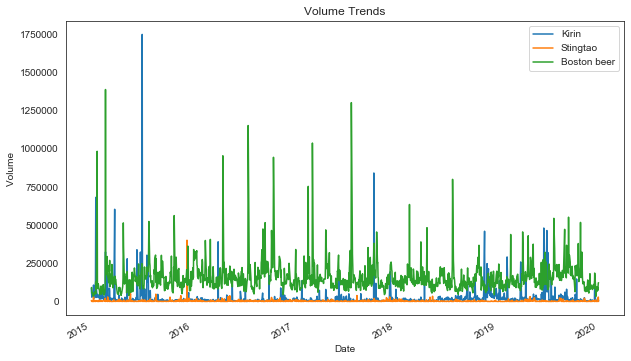

In [22]:
volume.plot(figsize=(10,6),title="Volume Trends" , )
plt.ylabel("Volume ")
plt.legend(labels=companies,loc=0)

# On Balance Volume

If the closing price is above the prior close price then: Current OBV = Previous OBV + Current Volume

If the closing price is below the prior close price then: Current OBV = Previous OBV - Current Volume

If the closing prices equals the prior close price then: Current OBV = Previous OBV (no change)

Formula for calculatoin has been taken from this [kaggle](https://www.kaggle.com/kratisaxena/stock-market-technical-indicators-visualization#Stock-Market-Visualization) post.

In [36]:
obv = (df['Volume'] * (~df['Close'].diff().le(0) * 2 -1)).cumsum()

In [81]:
# sns.lineplot(data=obv.loc[obv.index.year==2016,'SAM'])
monthy_rolling_boston=obv.loc[:,'SAM'].rolling(7).mean() 
monthy_rolling_kirin=obv.loc[:,'KNBWY'].rolling(7).mean() 

monthy_rolling_stingtao=obv.loc[:,'TSGTF'].rolling(7).mean() 

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'AVG Weekly Balance Volume')

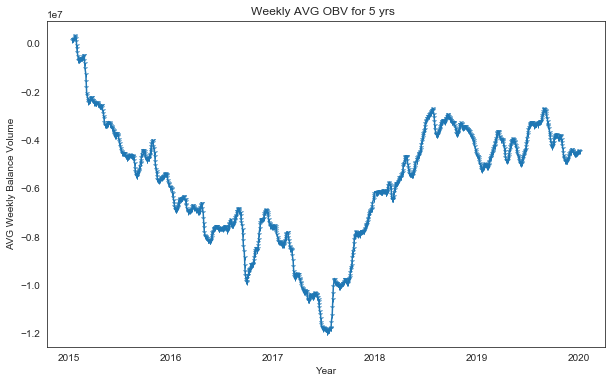

In [101]:
plt.figure(figsize=(10,6))

plt.plot(monthy_rolling_boston, marker="1" );
# plt.plot(monthy_rolling_kirin, marker="1" );

# plt.plot(monthy_rolling_stingtao, marker="1" )
plt.title("Weekly AVG OBV for 5 yrs  ")
plt.xlabel("Year")
plt.ylabel("AVG Weekly Balance Volume")

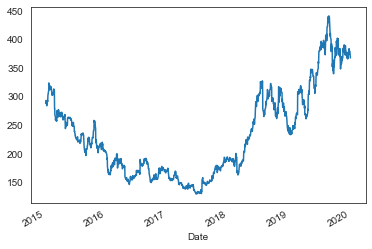

In [100]:
boston.Close.plot();
